*Handling Imbalance Dataset*

This mini project consist of undersampling , oversampling and smote minority for handling imbalance datasets

In [1]:
from google.colab import drive
drive.mount('/content/MyDrive/')

Drive already mounted at /content/MyDrive/; to attempt to forcibly remount, call drive.mount("/content/MyDrive/", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as np
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [3]:
data = pd.read_csv('/content/MyDrive/MyDrive/Churn_Modelling.csv')

In [4]:
data1 = pd.read_csv('/content/MyDrive/MyDrive/Churn_Modelling.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
data = data.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [7]:
data1 = data1.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [8]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [9]:
def print_unique(data):
  for column in data:
    if data[column].dtypes == 'object':
      print(f'{column}:{data[column].unique()}')

In [10]:
print_unique(data)

Geography:['France' 'Spain' 'Germany']
Gender:['Female' 'Male']


In [11]:
print_unique(data1)

Geography:['France' 'Spain' 'Germany']
Gender:['Female' 'Male']


In [12]:
data['Gender'].replace({'Female':0,'Male':1},inplace=True)

In [13]:
data1['Gender'].replace({'Female':0,'Male':1},inplace=True)

In [14]:
for column in data:
  print(f'{column} : {data[column].unique()}')

CreditScore : [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 

In [15]:
for column in data1:
  print(f'{column} : {data1[column].unique()}')

CreditScore : [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 

In [16]:
data = pd.get_dummies(data=data, columns=['Geography'])

In [17]:
data1 = pd.get_dummies(data=data1, columns=['Geography'])

In [18]:
for column in data:
  print(f'{column}:{data[column].unique()}')

CreditScore:[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 56

In [19]:
for column in data1:
  print(f'{column} : {data1[column].unique()}')

CreditScore : [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 

In [20]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [22]:
cols_to_scale = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])

In [23]:
cols_to_scale = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data1[cols_to_scale] = scaler.fit_transform(data1[cols_to_scale])

In [24]:
for column in data:
  print(f'{column}:{data[column].unique()}')

CreditScore:[0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.43

In [25]:
for column in data1:
  print(f'{column}:{data1[column].unique()}')

CreditScore:[0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.43

UnderSampling

In [26]:
# Class count
count_class_0, count_class_1 = data.Exited.value_counts()

# Divide by class
data_class_0 = data1[data1['Exited'] == 0]
data_class_1 = data1[data1['Exited'] == 1]

In [27]:
data_class_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7963 entries, 1 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        7963 non-null   float64
 1   Gender             7963 non-null   int64  
 2   Age                7963 non-null   float64
 3   Tenure             7963 non-null   float64
 4   Balance            7963 non-null   float64
 5   NumOfProducts      7963 non-null   float64
 6   HasCrCard          7963 non-null   int64  
 7   IsActiveMember     7963 non-null   int64  
 8   EstimatedSalary    7963 non-null   float64
 9   Exited             7963 non-null   int64  
 10  Geography_France   7963 non-null   uint8  
 11  Geography_Germany  7963 non-null   uint8  
 12  Geography_Spain    7963 non-null   uint8  
dtypes: float64(6), int64(4), uint8(3)
memory usage: 707.6 KB


In [28]:
data_class_0_under = data_class_0.sample(count_class_1)

In [29]:
data_class_0_under

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
9869,0.342,1,0.270270,0.6,0.000000,0.333333,1,0,0.257237,0,1,0,0
6485,0.580,1,0.108108,0.5,0.360317,0.000000,1,1,0.016437,0,0,1,0
9403,0.576,0,0.243243,0.6,0.000000,0.000000,1,0,0.821258,0,1,0,0
7581,0.716,1,0.324324,0.9,0.704279,0.333333,1,1,0.524016,0,0,1,0
3499,0.534,1,0.756757,1.0,0.000000,0.333333,1,1,0.269718,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7792,0.480,1,0.297297,0.8,0.000000,0.333333,1,0,0.314637,0,1,0,0
5631,0.564,1,0.297297,0.5,0.588489,0.000000,1,1,0.998412,0,1,0,0
8079,0.586,1,0.256757,0.6,0.000000,0.333333,0,0,0.712284,0,1,0,0
5968,0.352,1,0.135135,0.1,0.446677,0.000000,0,1,0.631412,0,1,0,0


In [30]:
data_test_under = pd.concat([data_class_0_under, data_class_1], axis=0)

In [31]:
print('Random-Sampling:')
print(data_test_under.Exited.value_counts())

Random-Sampling:
0    2037
1    2037
Name: Exited, dtype: int64


In [32]:
X = data_test_under.drop('Exited',axis=1)

In [33]:
y = data_test_under['Exited']

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=5, stratify=y)

In [35]:
y_train.value_counts()

0    1630
1    1629
Name: Exited, dtype: int64

In [36]:
y_test.value_counts()

1    408
0    407
Name: Exited, dtype: int64

In [37]:
X_train.shape

(3259, 12)

In [38]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [39]:
def ANN(X_train,y_train,X_test,y_test,loss,weights):
  model = keras.Sequential([
                            keras.layers.Dense(100,input_shape=(12,),activation='relu'),
                            keras.layers.Dense(50,activation='relu'),
                            keras.layers.Dense(1,activation='sigmoid')
  ])

  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
  
  if weights == -1:
    model.fit(X_train, y_train, epochs=100)
  
  else:
    model.fit(X_train, y_train, epochs=100, class_weight = weights)

  print(model.evaluate(X_test,y_test))
  
  y_preds = model.predict(X_test)
  y_preds = np.round(y_preds)

  print(print("Classification Report: \n", classification_report(y_test, y_preds)))

  cm = tf.math.confusion_matrix(labels=y_test,predictions=y_preds)
  plt.figure(figsize=(10,5))
  sns.heatmap(cm,annot=True,fmt='d')

  return y_preds

Epoch 1/100
102/102 [==============================] - 1s 2ms/step - loss: 0.6619 - accuracy: 0.6011
Epoch 2/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6080 - accuracy: 0.6649
Epoch 3/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5835 - accuracy: 0.6950
Epoch 4/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5697 - accuracy: 0.7088
Epoch 5/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5495 - accuracy: 0.7266
Epoch 6/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5320 - accuracy: 0.7318
Epoch 7/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5171 - accuracy: 0.7462
Epoch 8/100
102/102 [==============================] - 0s 2ms/step - loss: 0.4984 - accuracy: 0.7607
Epoch 9/100
102/102 [==============================] - 0s 2ms/step - loss: 0.4903 - accuracy: 0.7604
Epoch 10/100
102/102 [==============================] - 0s 2ms/step - loss: 0.4811 - accura

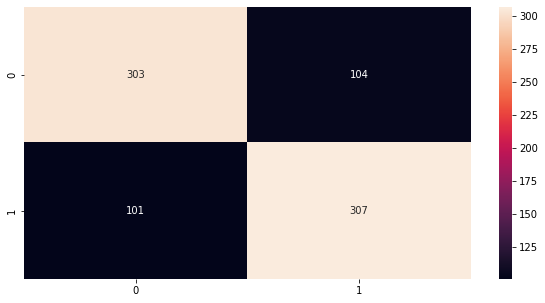

In [40]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Oversampling

In [41]:
data_class_1_over = data_class_1.sample(count_class_0, replace=True)
data_over = pd.concat([data_class_0, data_class_1_over], axis=0)

In [42]:
data_over.Exited.value_counts()

0    7963
1    7963
Name: Exited, dtype: int64

In [43]:
X_Ov = data_over.drop('Exited',axis=1)
y_Ov = data_over['Exited']

In [44]:
X_Ov.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [45]:
X_Ov.shape

(15926, 12)

In [46]:
x_train_o,x_test_o,y_train_o,y_test_o = train_test_split(X_Ov,y_Ov, test_size=0.2, random_state=15, stratify=y_Ov)

In [47]:
y_train_o.value_counts()

0    6370
1    6370
Name: Exited, dtype: int64

Epoch 1/100
399/399 [==============================] - 2s 3ms/step - loss: 0.6006 - accuracy: 0.6805
Epoch 2/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5277 - accuracy: 0.7370
Epoch 3/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4871 - accuracy: 0.7596
Epoch 4/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4770 - accuracy: 0.7684
Epoch 5/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4674 - accuracy: 0.7695
Epoch 6/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4629 - accuracy: 0.7710
Epoch 7/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4578 - accuracy: 0.7754
Epoch 8/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4528 - accuracy: 0.7800
Epoch 9/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4510 - accuracy: 0.7792
Epoch 10/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4451 - accura

array([[0.],
       [0.],
       [1.],
       ...,
       [1.],
       [0.],
       [1.]], dtype=float32)

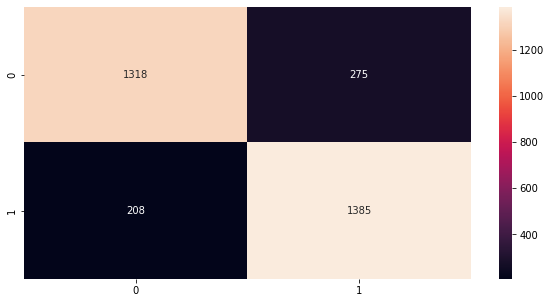

In [48]:
ANN(x_train_o,y_train_o,x_test_o,y_test_o,'binary_crossentropy',-1)

SMOTE

In [49]:
X = data.drop('Exited',axis='columns')
y = data['Exited']

In [50]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [51]:
from sklearn.model_selection import train_test_split
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [52]:
# Number of classes in training Data
y_train_sm.value_counts()

0    6370
1    6370
Name: Exited, dtype: int64

Epoch 1/100
399/399 [==============================] - 3s 4ms/step - loss: 0.6041 - accuracy: 0.6698
Epoch 2/100
399/399 [==============================] - 2s 4ms/step - loss: 0.5286 - accuracy: 0.7370
Epoch 3/100
399/399 [==============================] - 2s 4ms/step - loss: 0.4885 - accuracy: 0.7604
Epoch 4/100
399/399 [==============================] - 1s 4ms/step - loss: 0.4696 - accuracy: 0.7717
Epoch 5/100
399/399 [==============================] - 2s 4ms/step - loss: 0.4606 - accuracy: 0.7789
Epoch 6/100
399/399 [==============================] - 1s 4ms/step - loss: 0.4521 - accuracy: 0.7823
Epoch 7/100
399/399 [==============================] - 1s 3ms/step - loss: 0.4459 - accuracy: 0.7864
Epoch 8/100
399/399 [==============================] - 1s 3ms/step - loss: 0.4416 - accuracy: 0.7896
Epoch 9/100
399/399 [==============================] - 1s 3ms/step - loss: 0.4355 - accuracy: 0.7950
Epoch 10/100
399/399 [==============================] - 1s 4ms/step - loss: 0.4317 - accura

array([[0.],
       [1.],
       [1.],
       ...,
       [1.],
       [0.],
       [1.]], dtype=float32)

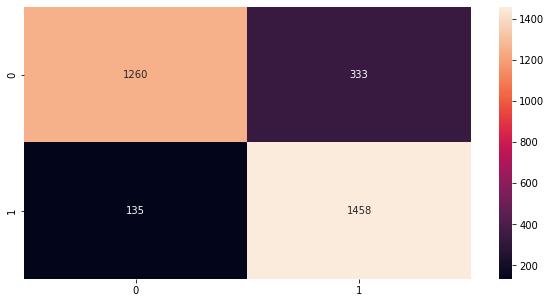

In [54]:
ANN(X_train_sm, y_train_sm, X_test_sm, y_test_sm, 'binary_crossentropy', -1)